# Credit Card Fraud Detection Visualizations
**Team:** Fraud Detectives  
**Course:** CS 445/545 Final Project Stage 2  
**Dataset:** Kaggle Credit Card Fraud Detection

## Setup & Data Loading

In [9]:
# Install kagglehub package, if not already installed
try:
    import kagglehub
except ImportError:
    import subprocess
    import sys

    # Install kagglehub using pip
    subprocess.check_call([sys.executable, "-m", "pip", "install", "kagglehub"])
    import kagglehub


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go



# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Load dataset
df = pd.read_csv(f"{path}/creditcard.csv")

# Convert Time to hours and create day/hour features
df['Hour'] = (df['Time'] // 3600) % 24
df['Day'] = (df['Time'] // (3600*24))
df['Time_Hours'] = df['Time'] / 3600

## Member 1: Temporal & Amount Analysis

### 1. Fraud Hourly Heatmap

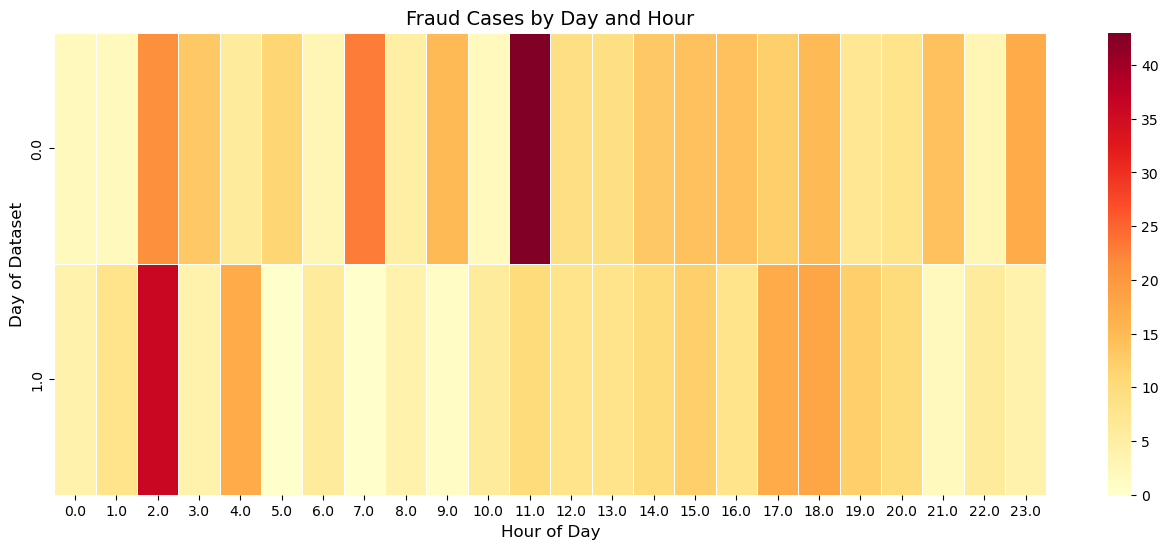

In [10]:
# Prepare heatmap data
heatmap_data = df[df['Class'] == 1].groupby(['Day', 'Hour']).size().unstack().fillna(0)

plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title('Fraud Cases by Day and Hour', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Dataset', fontsize=12)
plt.show()

### 2. Transaction Amount Distribution by Class

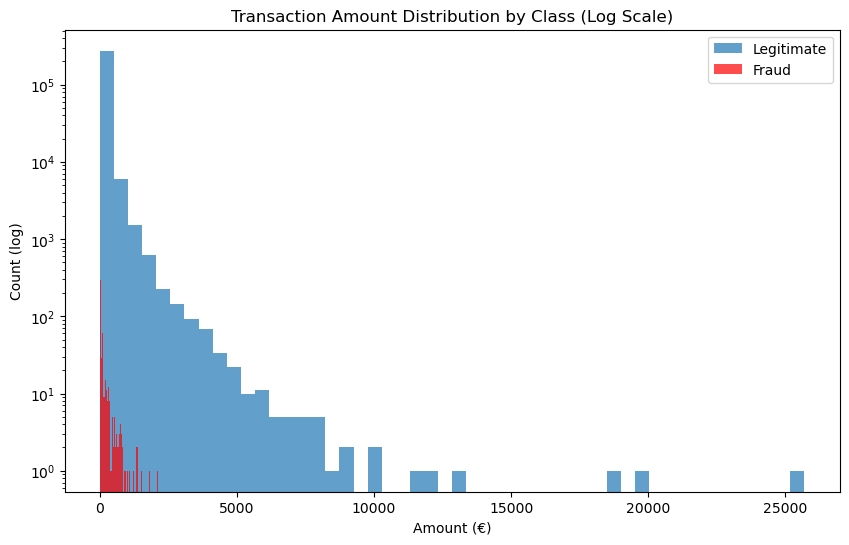

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.7, label='Legitimate', log=True)
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.7, label='Fraud', color='red', log=True)
plt.title('Transaction Amount Distribution by Class (Log Scale)')
plt.xlabel('Amount (€)')
plt.ylabel('Count (log)')
plt.legend()
plt.show()

### 3. Cumulative Fraud Timeline

ValueError: x and y must have same first dimension, but have shapes (124592,) and (492,)

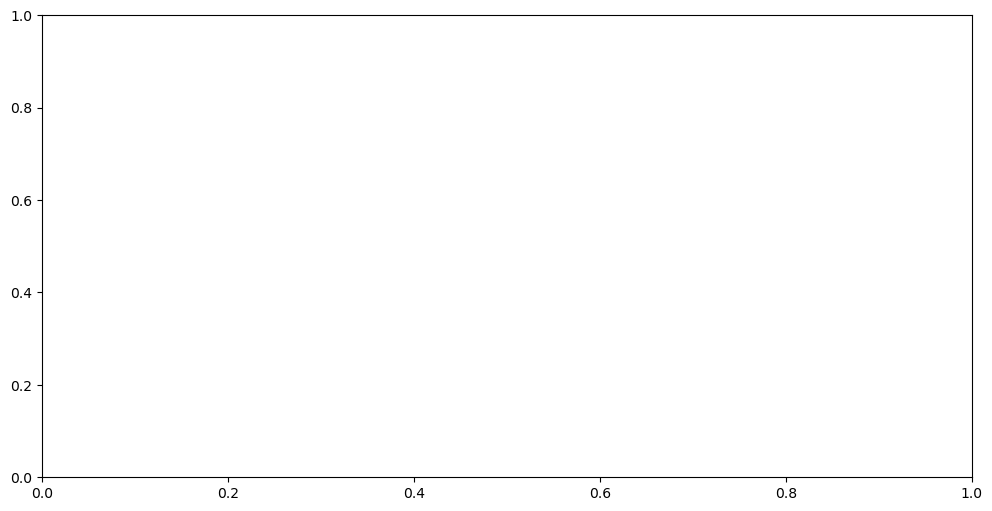

In [12]:
fraud_cumulative = df[df['Class'] == 1].sort_values('Time_Hours')['Class'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df.sort_values('Time_Hours')['Time_Hours'].unique(), fraud_cumulative)
plt.title('Cumulative Fraud Cases Over Time')
plt.xlabel('Hours Since First Transaction')
plt.ylabel('Total Fraud Cases')
plt.grid(True)
plt.show()

## Member 2: PCA Component Exploration

### 4. PCA Component Radar Chart

In [13]:
# Calculate mean values for top components
fraud_mean = df[df['Class'] == 1][['V1','V2','V3','V4','V5']].mean()
normal_mean = df[df['Class'] == 0][['V1','V2','V3','V4','V5']].mean()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=fraud_mean.values,
      theta=fraud_mean.index,
      fill='toself',
      name='Fraud'
))
fig.add_trace(go.Scatterpolar(
      r=normal_mean.values,
      theta=normal_mean.index,
      fill='toself',
      name='Normal'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  title='Mean Values of Top 5 PCA Components by Class',
  showlegend=True
)

fig.show()

### 5. Fraud Cluster Scatter Plot

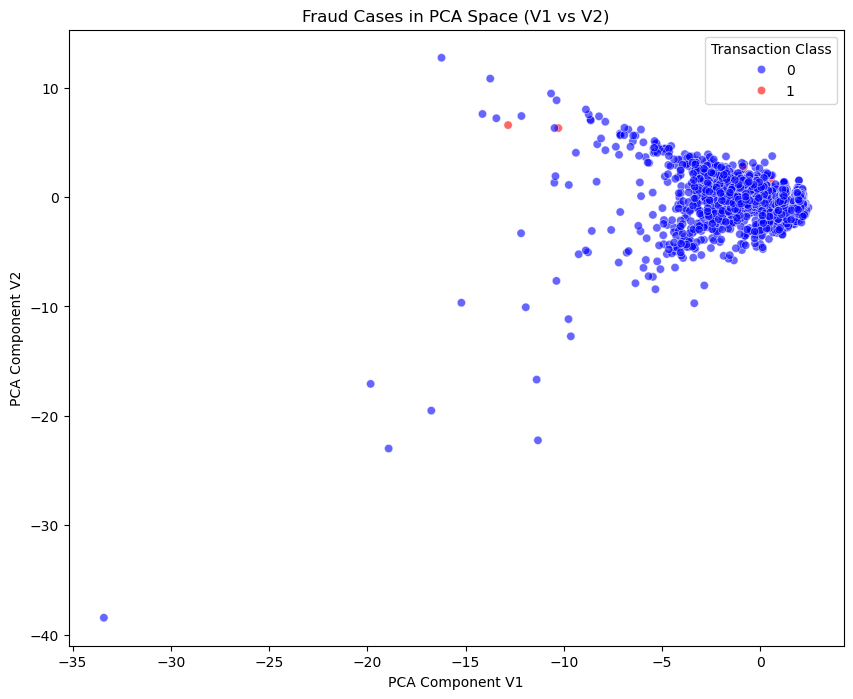

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df.sample(5000), x='V1', y='V2', hue='Class', 
                palette={0:'blue', 1:'red'}, alpha=0.6)
plt.title('Fraud Cases in PCA Space (V1 vs V2)')
plt.xlabel('PCA Component V1')
plt.ylabel('PCA Component V2')
plt.legend(title='Transaction Class')
plt.show()

### 6. Component Correlation Heatmap"

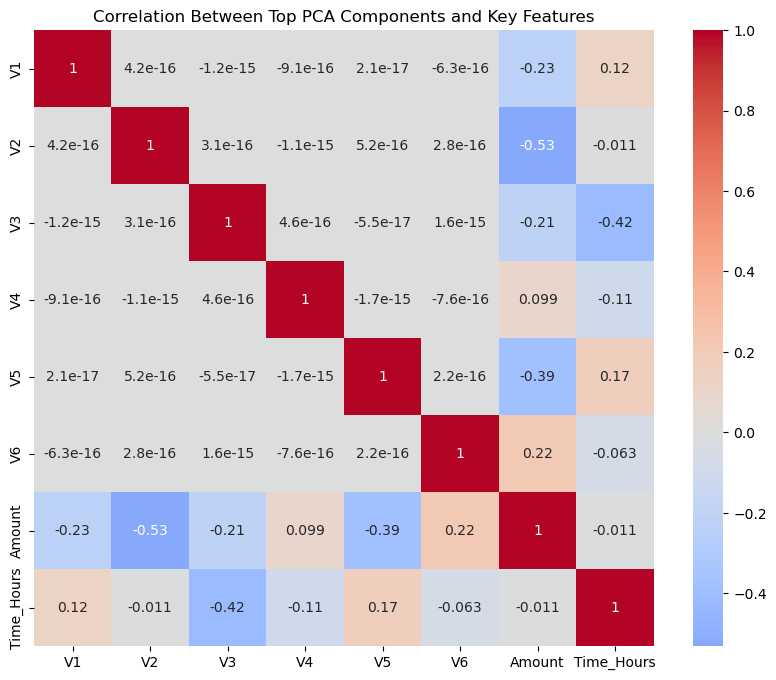

In [16]:
corr_matrix = df[['V1','V2','V3','V4','V5','V6','Amount','Time_Hours']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Top PCA Components and Key Features')
plt.show()


## Member 3: Comparative & Composite Visuals

### 7. Parallel Coordinates Plot

In [17]:
sample_df = df[df['Class'] == 1].sample(100, random_state=42).append(
    df[df['Class'] == 0].sample(100, random_state=42))

fig = px.parallel_coordinates(sample_df, 
                             dimensions=['Time_Hours', 'Amount', 'V1', 'V2', 'V3'],
                             color='Class',
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             title='Parallel Coordinates Plot of Fraud Features')
fig.show()

AttributeError: 'DataFrame' object has no attribute 'append'